
1.У вас, с прошлого урока, имеются реализации расчёта среднеквадратичной ошибки и её градиента для линейнй регрессии с коэффициентами при факторах(w) и свободным коэффициентам.

В этом задании вы должны модифицировать реализацию рассчёта среднеквадратичной ошибки и рассчёта её производной, так, чтобы с к среднеквадратичной ошибке добавлялась l2 регулярязационная поправка: +𝑐∗∑𝑗𝑤2𝑗 а к градиенту- ссответствующее выражение для градиента регулярязационной поправки.

2.На основе этих функций создайте свою регуляризированную полиномиальную регрессию и опробуйте на одном из примеров построения полиномиальной модели из этого урока.
Пояснение:Для этого Вам достаточно создать класс, который наследуется от класса polynomial_regression из данного урока, и переопределить в нём методы mserror, mserror_grad(под переопределением подразумевается создание на новом классе методов с таким же названием).

3*. (по желанию). Оцените оцените предсказательную способность реализованного метода с использование 5-ти ступенчатой кросс-валидации, показанной в примере выше.

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from linear_regression import linear_regression
from sklearn import datasets
from sklearn.linear_model import LinearRegression as sklearn_LR
%matplotlib inline


In [2]:
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3
np.random.seed(16)
x_data = np.random.uniform(-10, 10, 10)
print(x_data)
f_data = [f(i) for i in x_data] + np.random.uniform(-1000, 1000, 10)

[-5.53417842  0.46326683  1.01402913 -9.087961   -2.78542329 -5.53838117
  3.77452324 -6.7253715  -8.59350266  8.8202172 ]


In [3]:
class polynomial_regression(linear_regression):
    def __init__(self, max_power, *args, **kwargs):
        self.max_power=max_power
        super().__init__(*args, **kwargs)
    @staticmethod
    def generate_features(x, max_power):
        x=x[:, np.newaxis]
        return np.concatenate([x**i for i in range(1, max_power+1)], axis=1)
    def fit(self, x, y):
        super().fit(self.generate_features(x, self.max_power), y)
    def predict(self, x):
        return super().predict(self.generate_features(x, self.max_power)).flatten()
    def test(self, x, y):
        return super().test(self.generate_features(x, self.max_power), y)

In [30]:
class polynomial_regression_reg(polynomial_regression):
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        reg_coef = np.sum(np.square(self.w, dtype='float64'), dtype='float64')
        y = X.dot(self.w.T)+self.w0 + reg_coef
        return np.sum((y - y_real)**2) / y_real.shape[0]
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        y_hat = X.dot(self.w.T)
        delta = y_hat - y_real
        l = y_real.shape[0]
        grad = 2 * delta.T.dot(X)/l
        l2 = np.sum(np.square(self.w, dtype='float64'), dtype='float64')
        return grad + l2, np.sum(2*delta)/l

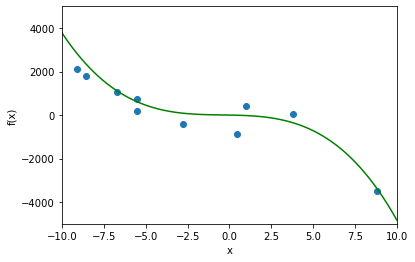

In [31]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

dots = np.linspace(-10, 10, 100)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

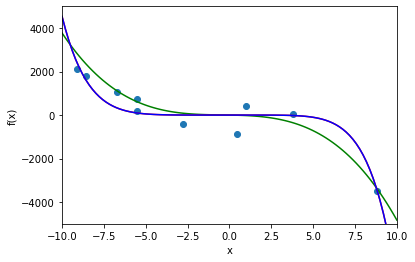

In [32]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

model1 = polynomial_regression(7, 0.0005, max_iter = 1e5)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')


model2 = polynomial_regression_reg(7, 0.0005, max_iter = 1e5)
model2.fit(x_data, f_data)
plt.plot(dots, model2.predict(dots), color='b')

3*. (по желанию). Оцените оцените предсказательную способность реализованного метода с использование 5-ти ступенчатой кросс-валидации, показанной в примере выше.

In [34]:
#Посчитаем р-квадрат
def r_square(y, y_real):
    ss_total=np.sum((y_real-np.mean(y_real))**2)
    ss_res=np.sum((y_real-y)**2)
    return 1-ss_res/ss_total
print(f"Коэффициент детерминации для второй модели = {r_square(model2.predict(x_data), f_data)}")

Коэффициент детерминации для второй модели = 0.9061154972664904


R2 коэффициент стремится к единице, значит модель хорошо описывает данные. 